# **K-NN para Classificação**

In [ ]:
# Importa as bibliotecas e frameworks necessários
import pandas as pd # Biblioteca Pandas para análise de dados
import matplotlib.pyplot as plt # Biblioteca Matplotlib para gráficos
import seaborn as sns # Biblioteca Seaborn para gráficos
import numpy as np # Biblioteca Numpy para computação científica

# Biblioteca Scikit-Learn para Pré-processamento de dados, uso de modelos de Aprendizado de Máquina e de métricas de avaliação
from sklearn.model_selection import train_test_split # Separação de conjuntos de dados em treinamento e testes
from sklearn.neighbors import KNeighborsClassifier # Algoritmo K-NN para classificação
from sklearn.metrics import classification_report, confusion_matrix # Métricas para avaliação de desempenho do K-NN em problemas de classificação

# Não exibir os warnings gerais
import warnings
warnings.filterwarnings("ignore")

# Exportar modelos treinados em pkl
import joblib


In [ ]:
dataset = pd.read_csv("iris.csv") # Lê um conjunto de dados em csv e o armazena como uma tabela (dataframe)
#dataset.head() # Exibe as primeiras cinco linhas (amostras) do conjunto de dados
#dataset.tail() # Exibe as últimas cinco linhas (amostras) do conjunto de dados
dataset.sample(5) # Exibe n amostras aleatórias do conjunto de dados


,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
39,5.1,3.4,1.5,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
96,5.7,2.9,4.2,1.3,versicolor
79,5.7,2.6,3.5,1.0,versicolor


In [ ]:
dataset.info() # Exibe as informações básicas do conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.describe() # Exibe estatísticas descritivas do conjunto de dados

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Distribuição das classes no dataset
dataset["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


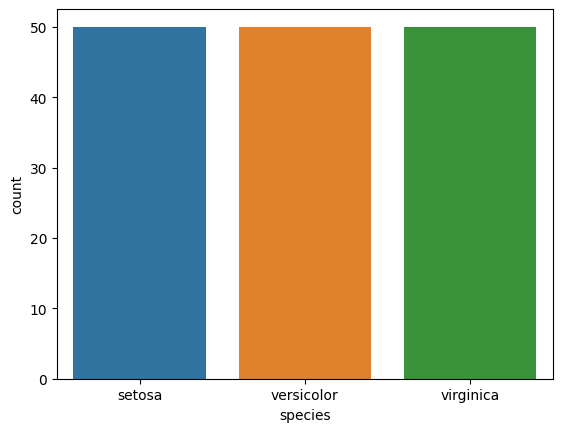

In [ ]:
# Visualizar distribuição das classes
sns.countplot(x="species", data=dataset, hue="species")
plt.show()

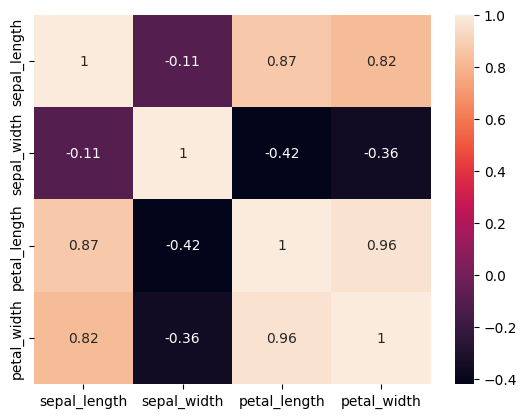

In [ ]:
X = dataset.drop('species', axis=1) # Armazena apenas as colunas de entrada de dados do conjunto de dados
y = dataset['species'] # Armazena a coluna de rótulos do conjunto de dados

# Esboça o gráfico de mapa de calor (heatmap) da correlação das colunas de entrada do conjunto de dados
sns.heatmap(X.corr(), annot=True)
plt.show()

In [ ]:
#X = X.drop(['sepal_length', 'sepal_width'], axis=1) # Descarta as colunas de comprimento e largura da sépala da flor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 3) # Separa os percentuais de dados para treinamento e testes do algoritmo

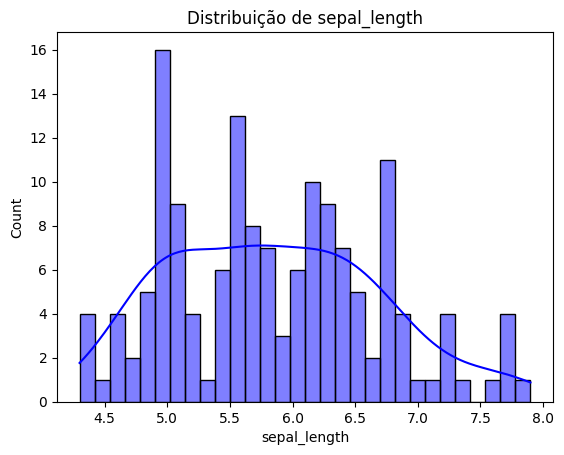

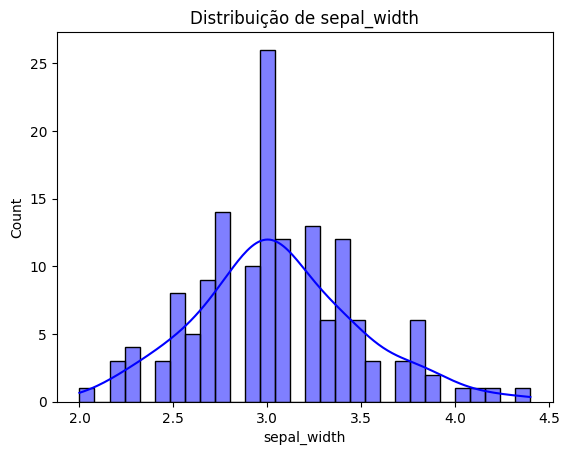

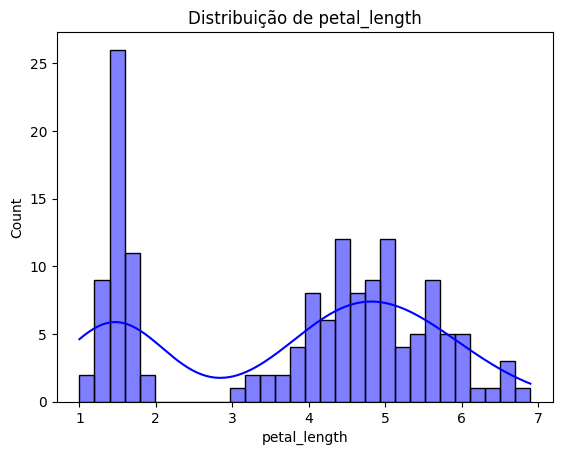

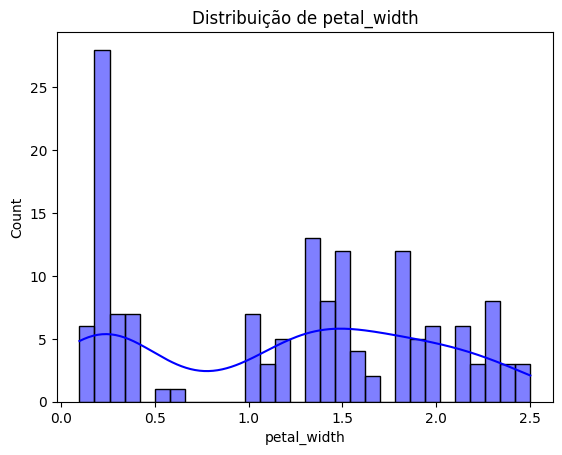

In [ ]:
# Histogramas das características numéricas
for feature in dataset.columns[:-1]:
    sns.histplot(dataset[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribuição de {feature}")
    plt.show()

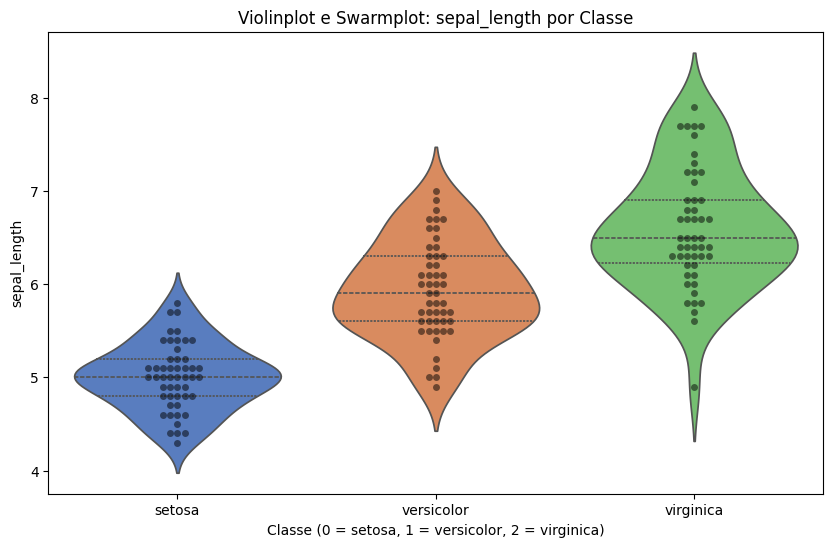

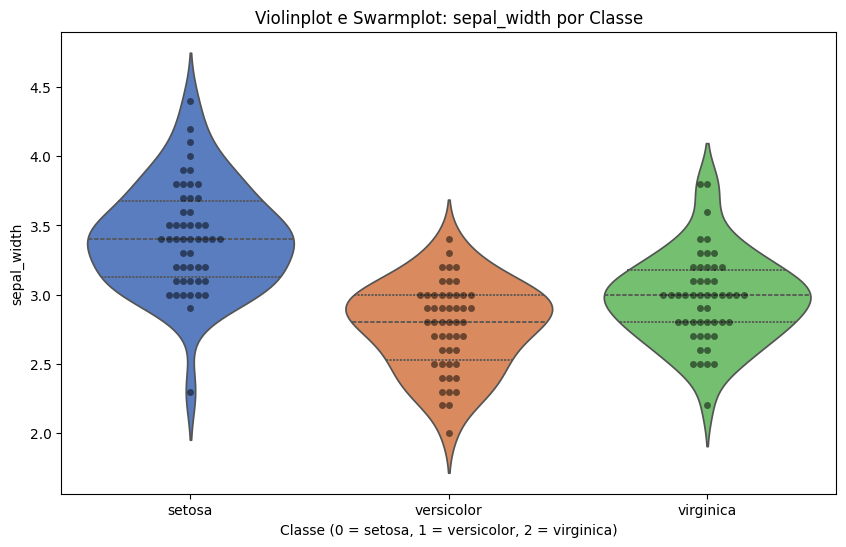

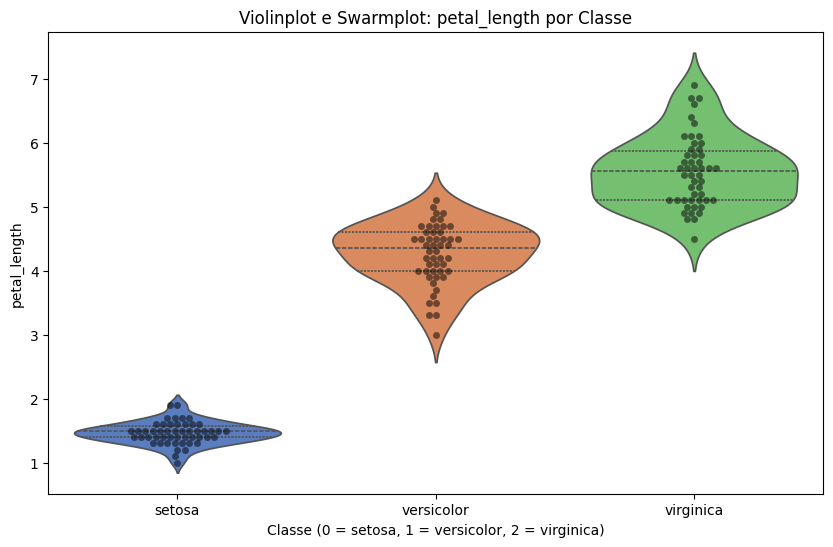

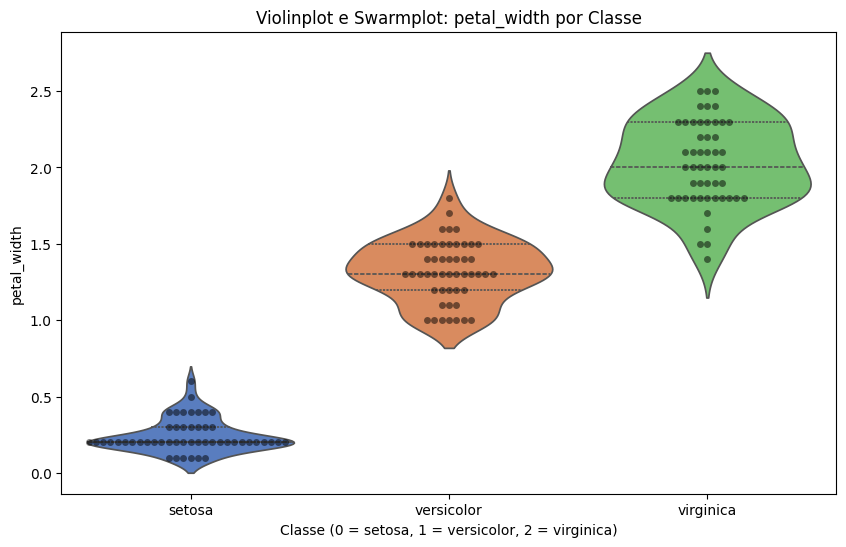

In [ ]:
# Gráficos de distribuição das características numéricas por classe do conjunto de dados
for feature in dataset.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=dataset, x="species", y=feature, hue='species', palette="muted", inner="quartile")
    sns.swarmplot(data=dataset, x="species", y=feature, color="k", alpha=0.5)
    plt.title(f"Violinplot e Swarmplot: {feature} por Classe")
    plt.xlabel("Classe (0 = setosa, 1 = versicolor, 2 = virginica)")
    plt.ylabel(feature)
    plt.show()

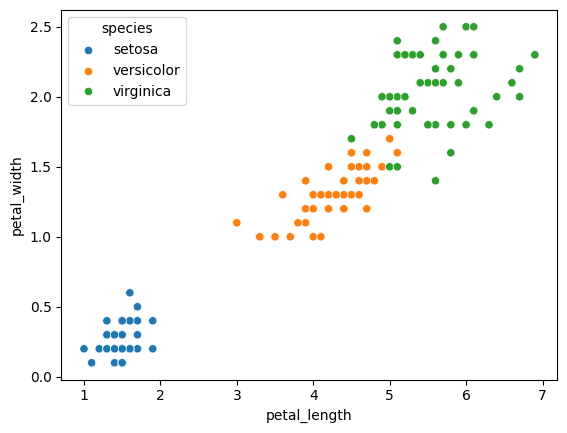

In [ ]:
# Esboça o gráfico de dispersão entre as variáveis de comprimento e largura da pétala da flor
sns.scatterplot(x='petal_length', y='petal_width', data=dataset, hue='species')
plt.show()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.86      0.92        14
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



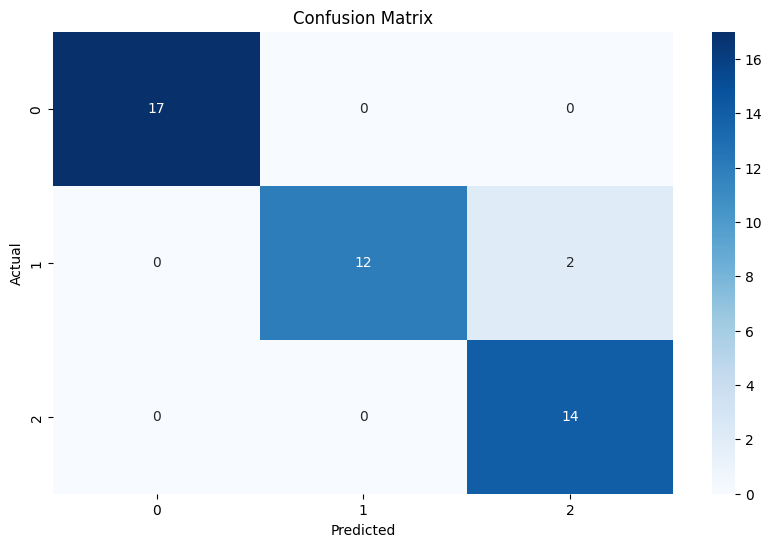

In [ ]:
# Inicializar o algoritmo K-NN
knn_classifier = KNeighborsClassifier(n_neighbors=3) # Valor de K = 3

# Treinar o algoritmo de K-NN
knn_classifier = knn_classifier.fit(X_train, y_train) # Passa os dados e rótulos dos dados de treinamento

# Avaliar performance do algoritmo K-NN treinado com os dados de teste

y_pred = knn_classifier.predict(X_test) # Armazena rótulos preditos para os dados de teste
print(classification_report(y_test, y_pred)) # Exibe o Relatório de Classificação

cf = confusion_matrix(y_test, y_pred) # Armazena Resultados da Matriz de Confusão

plt.figure(figsize=(10, 6)) # Altera o tamanho do gráfico
sns.heatmap(cf, annot=True, cmap='Blues', fmt = 'd') # Cria um gráfico no formato de heatmap para exibir a matriz de confusão
plt.title('Confusion Matrix') # Atribui um título para o gráfico
plt.xlabel('Predicted') # Atribui um título para os dados do eixo X
plt.ylabel('Actual') # Atribui um título para os dados do eixo Y
plt.show() # Exibe o gráfico

In [ ]:
# Nova amostra para predição
import warnings
warnings.filterwarnings("ignore")

new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_pred = knn_classifier.predict(new_sample)
new_sample_proba = knn_classifier.predict_proba(new_sample)


print(f"A nova amostra é classificada como: {new_sample_pred[0]}")
print(f"Probabilidades de cada classe: {new_sample_proba[0]*100}%")

A nova amostra é classificada como: setosa
Probabilidades de cada classe: [100.   0.   0.]%


In [ ]:
joblib.dump(knn_classifier, 'knn_classifier_model.pkl') # Exporta modelo treinado

['knn_classifier_model.pkl']

# **K-NN para Regressão**

In [ ]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Exportar modelos treinados em pkl
import joblib

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Algoritmo KNN
from sklearn.neighbors import KNeighborsRegressor

# Avaliação do modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [ ]:
# Carregar o dataset
df = pd.read_csv('Housing.csv')

# Visualizar as primeiras linhas do dataset
df.head()


In [ ]:
# Verificar informações gerais
df.info()

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna")
print(df.isnull().sum())

In [ ]:
# Verificar estatísticas básicas
df.describe(include='all')

In [ ]:
# Codificação binária para colunas yes/no
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_encoded = df.copy()
df_encoded[binary_cols] = df_encoded[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# One-hot encoding para 'furnishingstatus'
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'],dtype=int)

df_encoded.head()


In [ ]:
# Separar variáveis independentes (X) e variável dependente (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Normalizar os dados (importante para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Instanciar o modelo com k=5 (exemplo)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Treinar o modelo
knn_regressor = knn_regressor.fit(X_train, y_train)


In [ ]:
# Fazer previsões
y_pred = knn_regressor.predict(X_test)

# Avaliar desempenho
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"R² Score: {r2:.2f}")


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos (KNN)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Traçar a linha dos valores reais
plt.plot(y_test.values, label='Valor Real', color='red', linewidth=2, linestyle='-')

# Traçar a linha dos valores previstos
plt.plot(y_pred, label='Valor Predito', color='blue', linewidth=2, linestyle='--')

plt.title('Valores Reais vs. Valores Preditos - KNN Regressor')
plt.xlabel('Índice da Amostra')
plt.ylabel('Preço da Casa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
joblib.dump(knn_regressor, 'knn_regressor_model.pkl') # Exporta modelo treinado

# **Árvore de Decisão para Classificação**

In [ ]:
# Import das bibliotecas

import pandas as pd # Biblioteca pandas para análise e manipulação de dados
import matplotlib.pyplot as plt # Biblioteca matplotlib para customizar gráficos
import seaborn as sns # Biblioteca Seaborn para esboçar gráficos
import numpy as np # Biblioteca numpy para cálculos matemáticos e vetorização
import graphviz # Biblioteca ghaphviz

# Exportar modelos treinados em pkl
import joblib

from sklearn.model_selection import train_test_split # Dividir os dados do conjunto em proporção de treinamento e testes
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz # Usar o modelo de árvore de decisão para classificação e desenhar a árvore
from sklearn.metrics import classification_report, confusion_matrix # Avaliar o desempenho do modelo


In [ ]:
# Carregar conjunto de dados

dataset = pd.read_csv("iris.csv") # Lê um conjunto de dados em csv e o armazena como uma tabela (dataframe)
#dataset.head() # Exibe as primeiras cinco linhas (amostras) do conjunto de dados
# dataset.tail() # Exibe as últimas cinco linhas (amostras) do conjunto de dados
dataset.sample(10) # Exibe n amostras aleatórias do conjunto de dados

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
83,6.0,2.7,5.1,1.6,versicolor
82,5.8,2.7,3.9,1.2,versicolor
144,6.7,3.3,5.7,2.5,virginica
139,6.9,3.1,5.4,2.1,virginica
30,4.8,3.1,1.6,0.2,setosa
123,6.3,2.7,4.9,1.8,virginica
105,7.6,3.0,6.6,2.1,virginica
12,4.8,3.0,1.4,0.1,setosa
93,5.0,2.3,3.3,1.0,versicolor


In [ ]:
# Informações gerais do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Análise descritiva do dataset
dataset.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
# Distribuição das classes no dataset
dataset["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


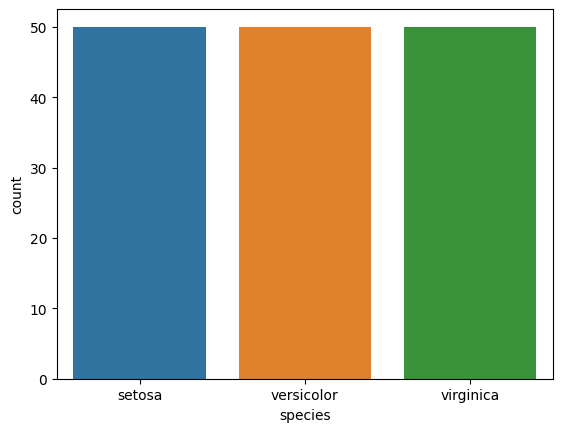

In [ ]:
# Visualizar distribuição das classes
sns.countplot(x="species", data=dataset, hue="species")
plt.show()

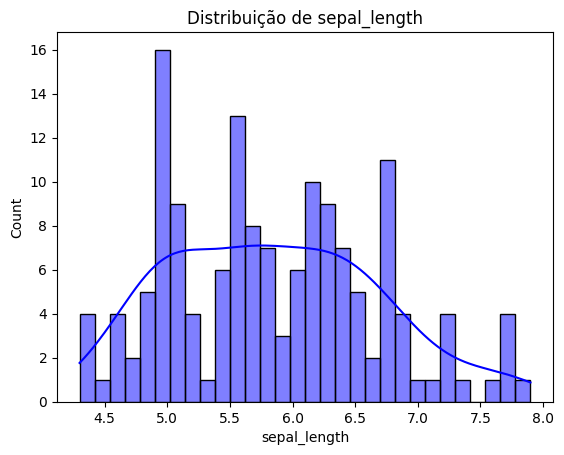

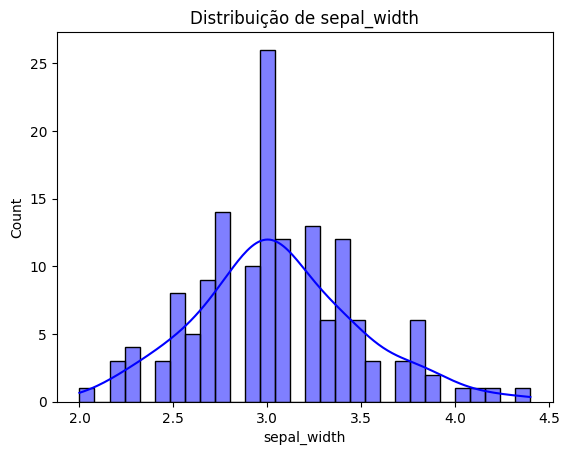

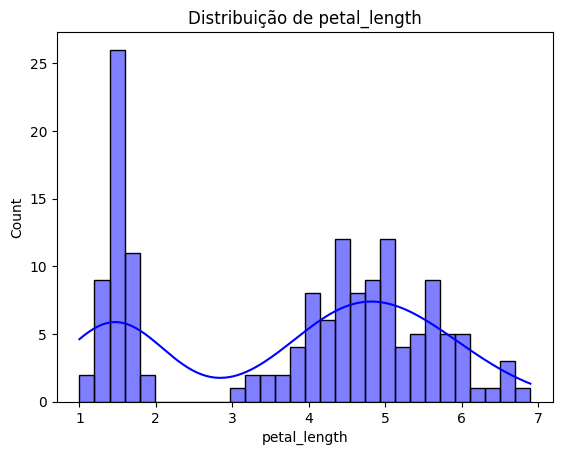

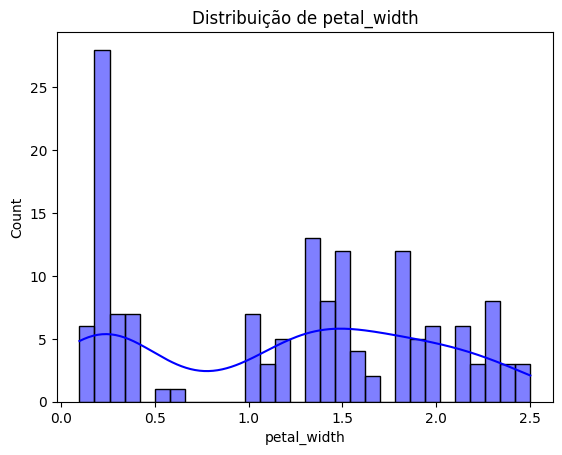

In [ ]:
# Histogramas das características numéricas
for feature in dataset.columns[:-1]:
    sns.histplot(dataset[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribuição de {feature}")
    plt.show()

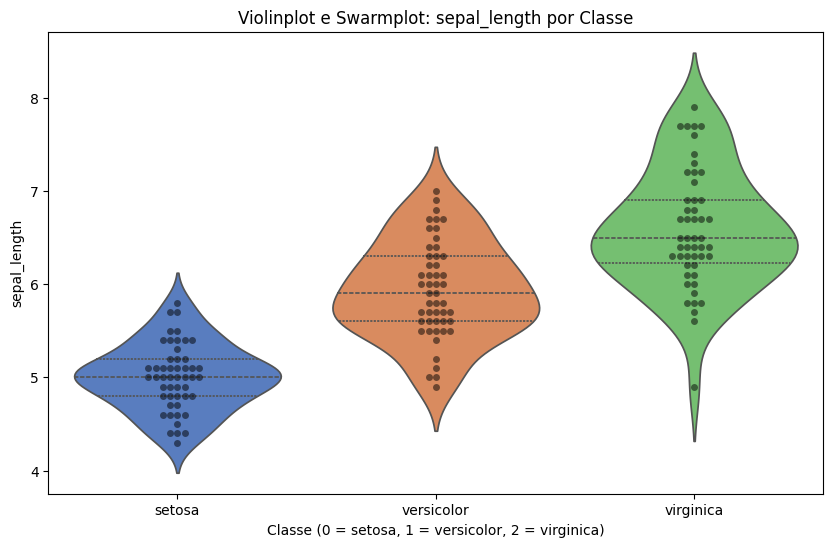

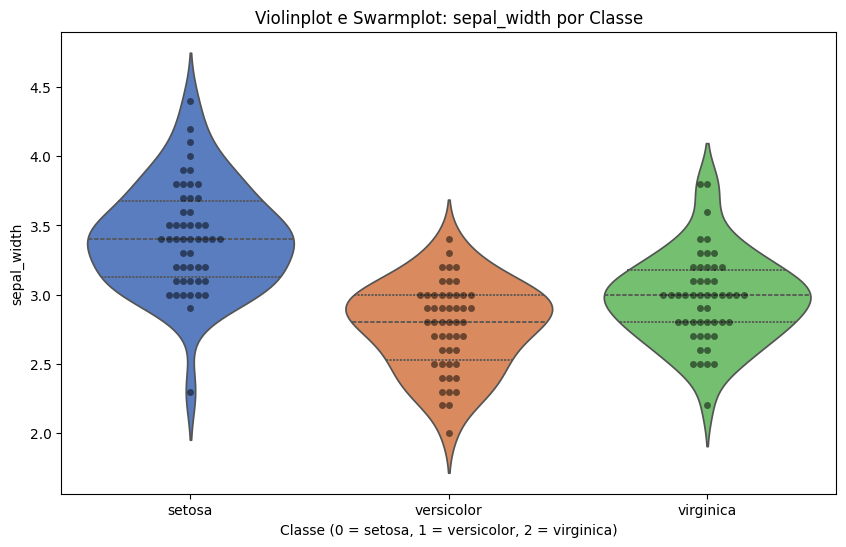

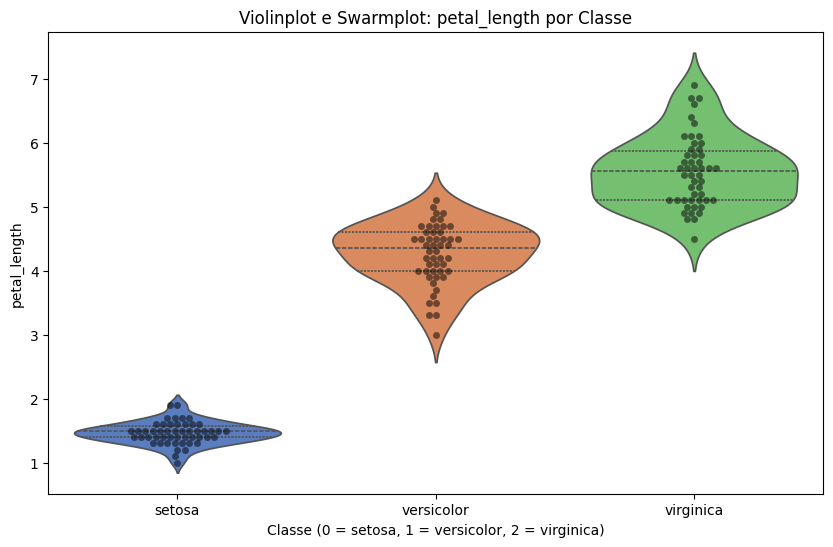

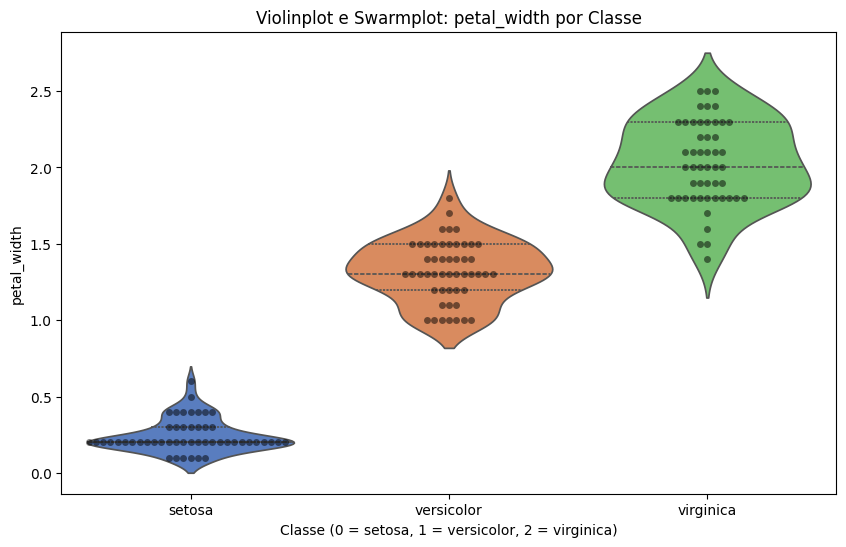

In [ ]:
# Gráficos de distribuição das características numéricas por classe do conjunto de dados
for feature in dataset.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=dataset, x="species", y=feature, hue='species', palette="muted", inner="quartile")
    sns.swarmplot(data=dataset, x="species", y=feature, color="k", alpha=0.5)
    plt.title(f"Violinplot e Swarmplot: {feature} por Classe")
    plt.xlabel("Classe (0 = setosa, 1 = versicolor, 2 = virginica)")
    plt.ylabel(feature)
    plt.show()

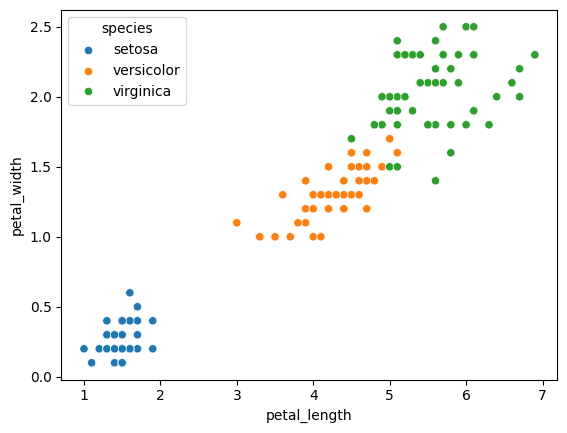

In [ ]:
# Esboça o gráfico de dispersão entre as variáveis de comprimento e largura da pétala da flor
sns.scatterplot(x='petal_length', y='petal_width', data=dataset, hue='species')
plt.show()

In [ ]:
# Separação dos dados de entrada e da coluna de rótulos
X = dataset.drop('species', axis=1)
y = dataset['species']


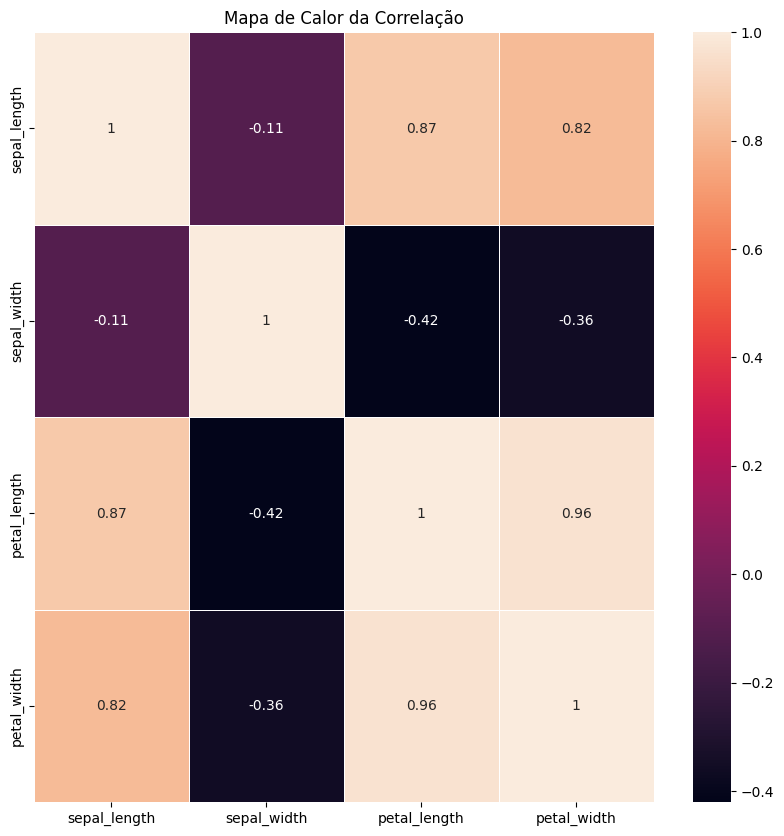

In [ ]:
# Heatmap da correlação dos dados de entrada do conjunto de dados
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, linewidth=0.5)
plt.title("Mapa de Calor da Correlação")
plt.show()


In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Instancia e treina o modelo de Árvore de decisão para classificação

arvore_decisao_classificador = DecisionTreeClassifier(random_state=0, criterion='gini')
arvore_decisao_classificador = arvore_decisao_classificador.fit(X_train, y_train)


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.71      0.83        14
   virginica       0.78      1.00      0.88        14

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.90        45
weighted avg       0.93      0.91      0.91        45



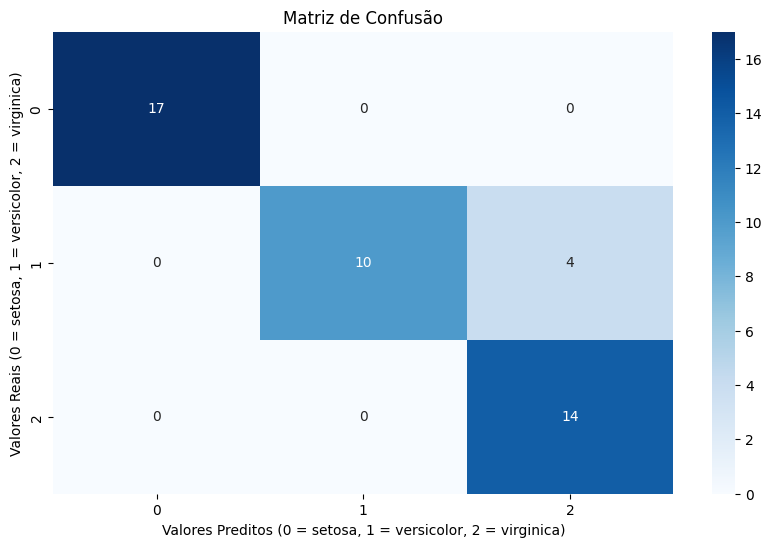

In [ ]:
# Avaliação do modelo

# Armazena as predições do modelo
y_pred = arvore_decisao_classificador.predict(X_test)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=dataset['species'].unique()))

# Matriz de Confusão
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cf, annot=True, cmap='Blues', fmt = 'd')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos (0 = setosa, 1 = versicolor, 2 = virginica)')
plt.ylabel('Valores Reais (0 = setosa, 1 = versicolor, 2 = virginica)')
plt.show()

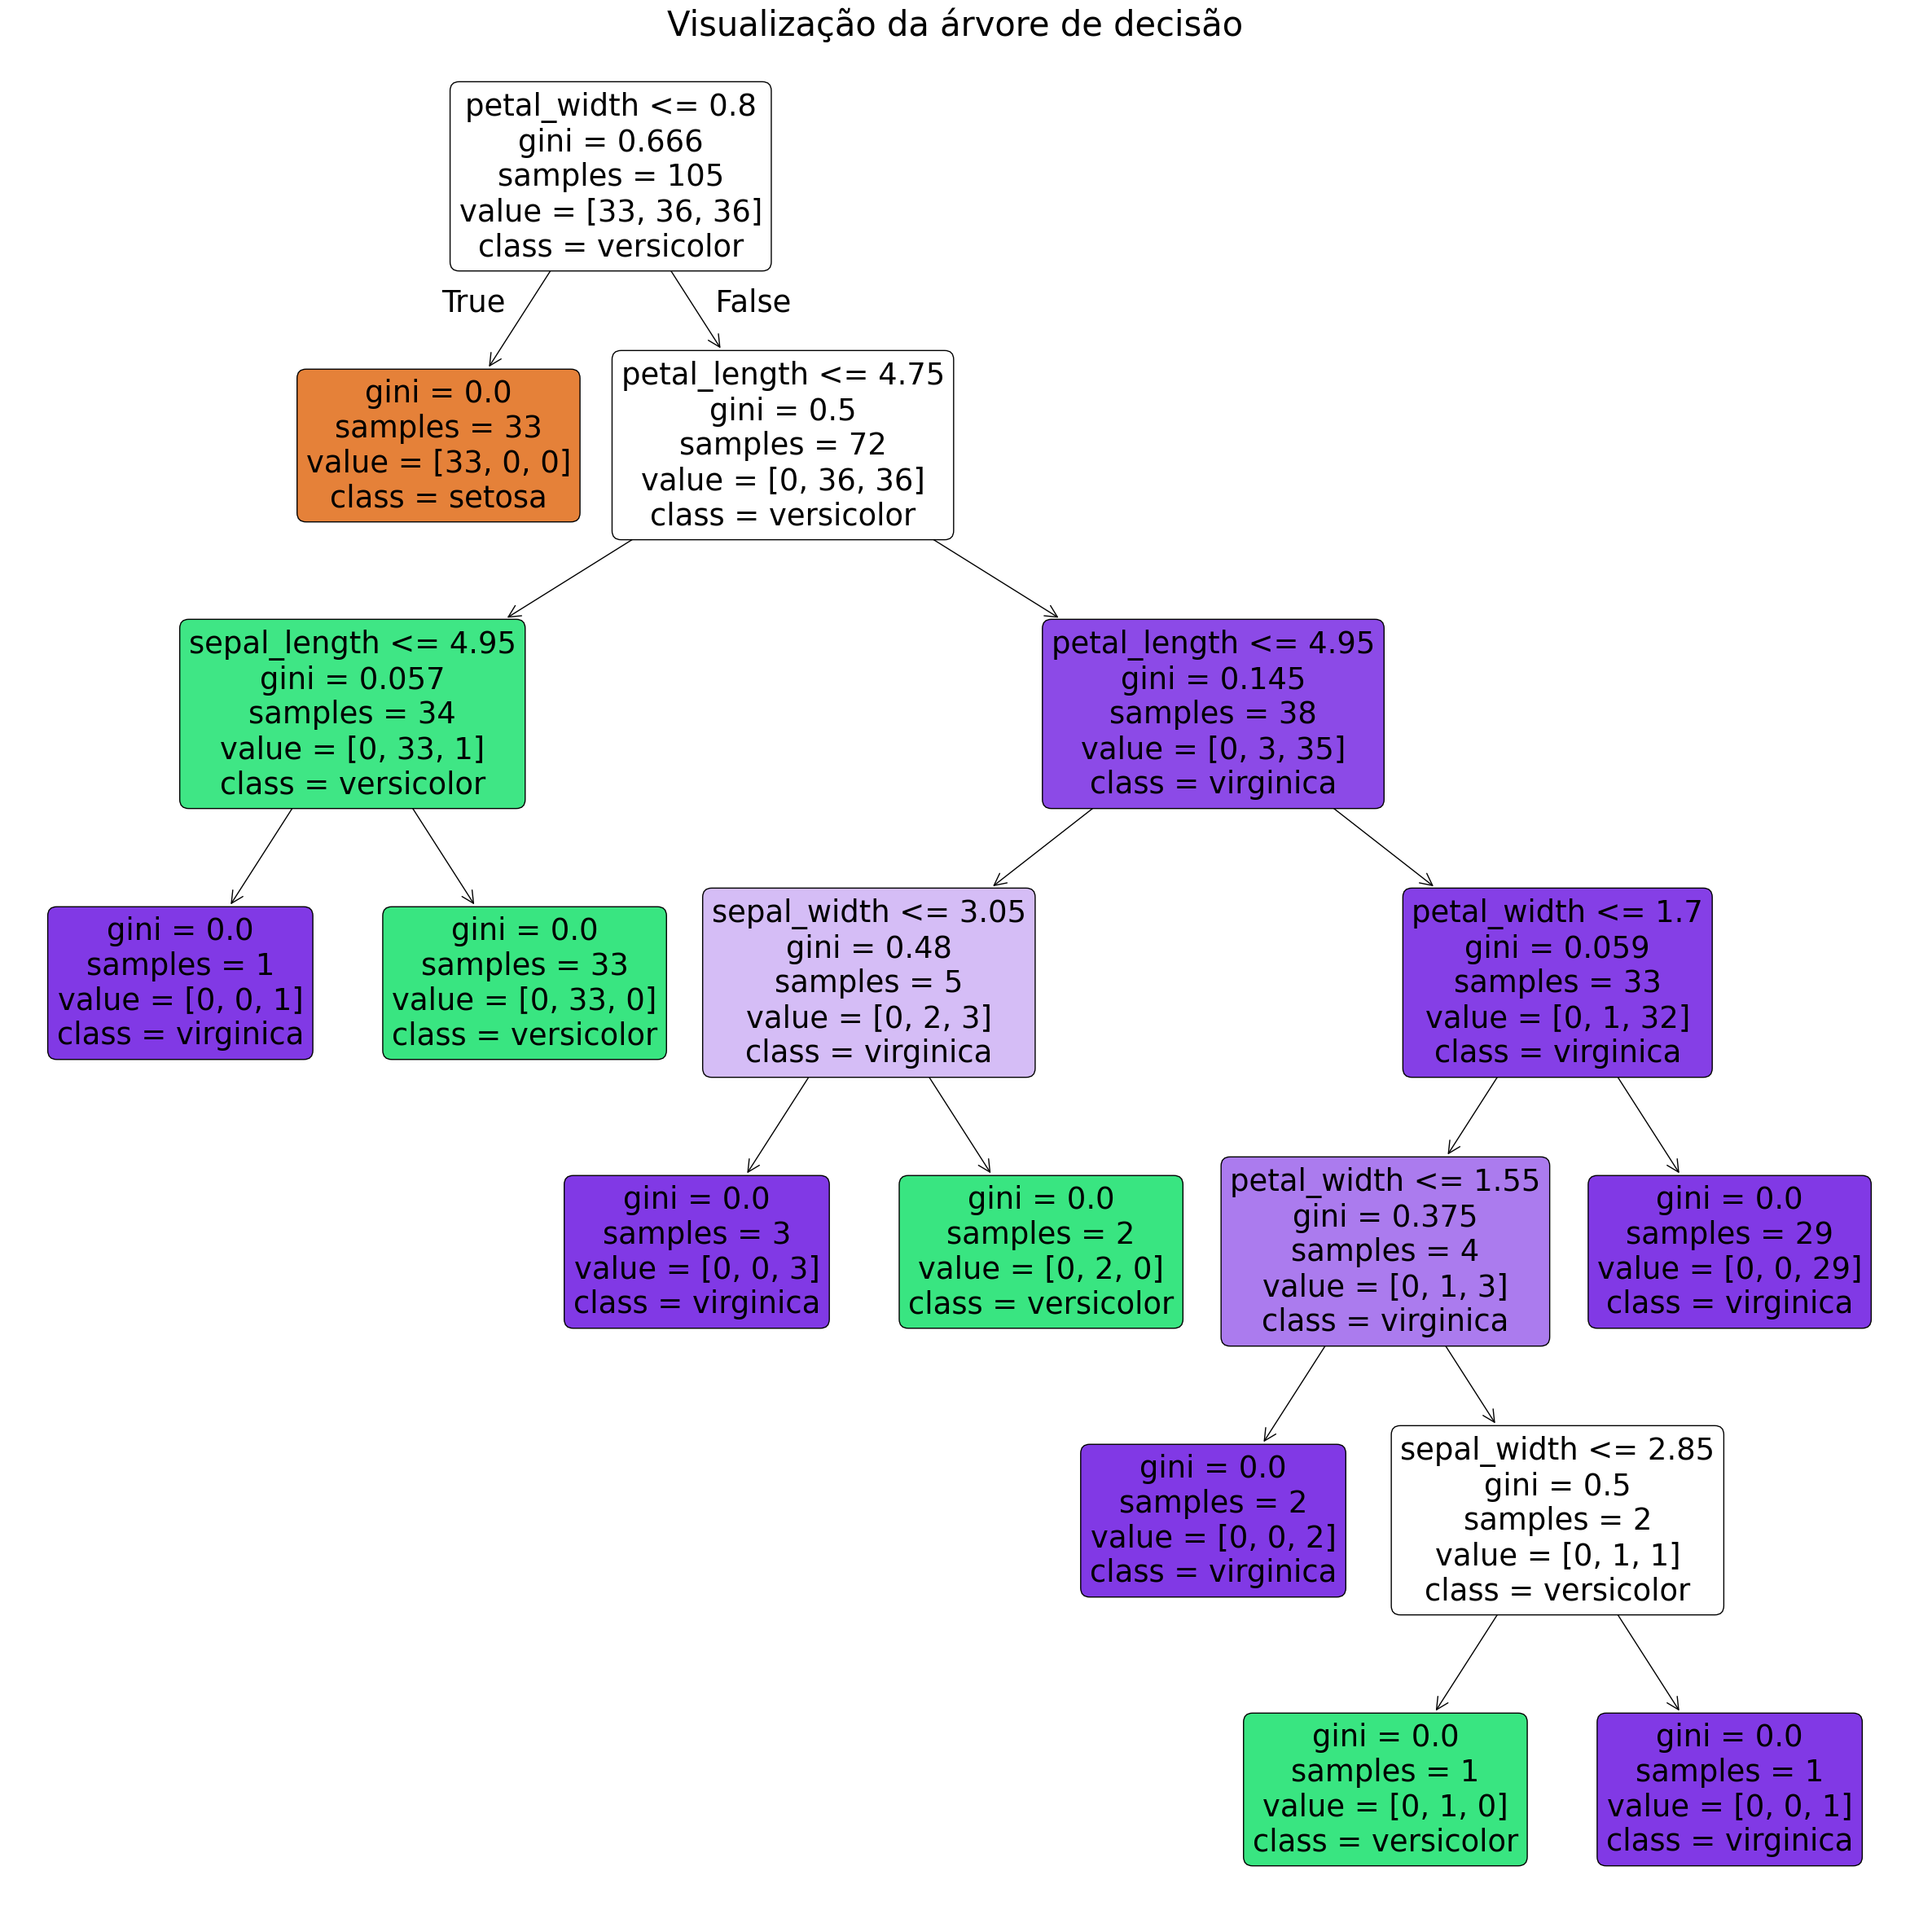

In [ ]:
# Visualizar árvore completa
plt.figure(figsize=(30, 30))
plot_tree(arvore_decisao_classificador, filled=True, feature_names=X.columns, class_names=dataset['species'].unique(), rounded=True)
plt.title("Visualização da árvore de decisão", fontsize=30)
plt.show()

In [ ]:
# Nova amostra para predição
import warnings
warnings.filterwarnings("ignore")

new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_pred = arvore_decisao_classificador.predict(new_sample)
new_sample_proba = arvore_decisao_classificador.predict_proba(new_sample)


print(f"A nova amostra é classificada como: {new_sample_pred[0]}")
print(f"Probabilidades de cada classe: {new_sample_proba[0]*100}%")


A nova amostra é classificada como: setosa
Probabilidades de cada classe: [100.   0.   0.]%


In [ ]:
joblib.dump(arvore_decisao_classificador, 'arvore_decisao_classificador_model.pkl') # exporta modelo treinado

['arvore_decisao_classificador_model.pkl']

# **Árvore de Decisão para Regressão**

In [ ]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Exportar modelos treinados em pkl
import joblib

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Algoritmo Árvore de Decisão para Regressão
from sklearn.tree import DecisionTreeRegressor

# Avaliação do modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
dataset = pd.read_csv("Housing.csv")
dataset.head()

In [ ]:
# Verificar informações gerais
dataset.info()

In [ ]:
# Verificar estatísticas básicas
dataset.describe()

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna")
print(dataset.isnull().sum())

In [ ]:
# Codificação binária para colunas yes/no
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dataset_encoded = dataset.copy()
dataset_encoded[binary_cols] = dataset_encoded[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# One-hot encoding para 'furnishingstatus'
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['furnishingstatus'],dtype=int)

dataset_encoded.head()

In [ ]:
# Separar variáveis independentes (X) e variável dependente (y)
X = dataset_encoded.drop('price', axis=1)
y = dataset_encoded['price']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
arvore_decisao_regressor = DecisionTreeRegressor(random_state=42, criterion='absolute_error')
arvore_decisao_regressor = arvore_decisao_regressor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

y_pred = arvore_decisao_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos (KNN)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Traçar a linha dos valores reais
plt.plot(y_test.values, label='Valor Real', color='red', linewidth=2, linestyle='-')

# Traçar a linha dos valores previstos
plt.plot(y_pred, label='Valor Predito', color='blue', linewidth=2, linestyle='--')

plt.title('Valores Reais vs. Valores Preditos - KNN Regressor')
plt.xlabel('Índice da Amostra')
plt.ylabel('Preço da Casa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
new_sample = X_test[[0]]
true_value = y_test.iloc[0]
predicted_value = arvore_decisao_regressor.predict(new_sample)[0]

print(f"Valor real: {true_value:.2f}")
print(f"Valor previsto: {predicted_value:.2f}")

In [ ]:
joblib.dump(arvore_decisao_regressor, 'arvore_decisao_regressor_model.pkl') # Exporta modelo treinado

# **Redes Neurais para Classificação**

In [ ]:
# Import das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Carregar conjunto de dados

dataset = pd.read_csv("iris.csv") # Lê um conjunto de dados em csv e o armazena como uma tabela (dataframe)
dataset.head() # Exibe as primeiras cinco linhas (amostras) do conjunto de dados
# dataset.tail() # Exibe as últimas cinco linhas (amostras) do conjunto de dados
# dataset.sample(10) # Exibe n amostras aleatórias do conjunto de dados

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Informações gerais do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Análise descritiva do dataset
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Distribuição das classes no dataset
dataset["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


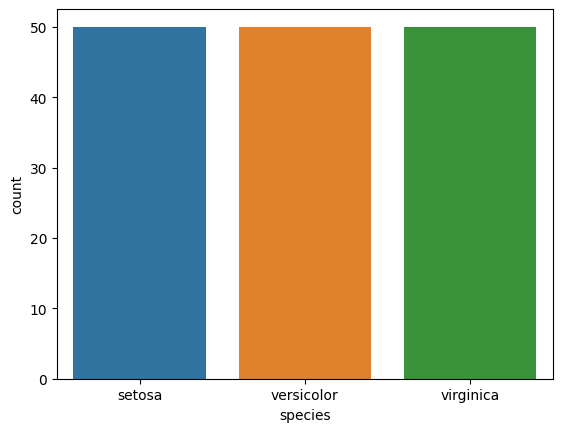

In [ ]:
# Visualizar distribuição das classes
sns.countplot(x="species", data=dataset, hue="species")
plt.show()

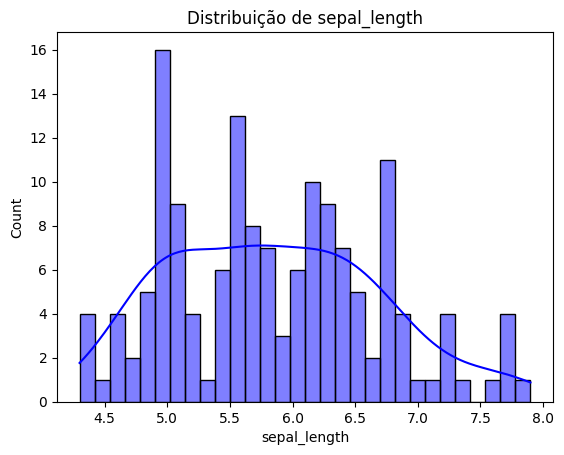

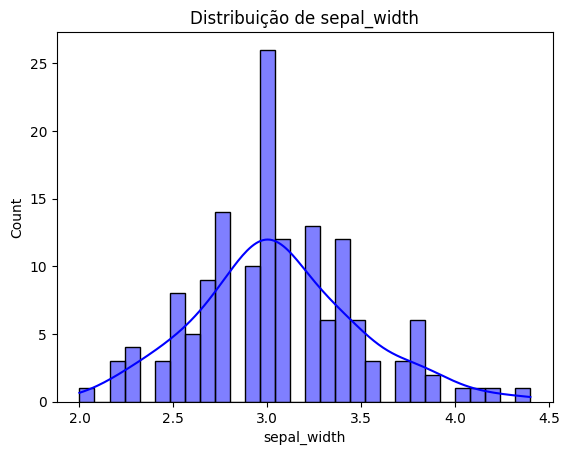

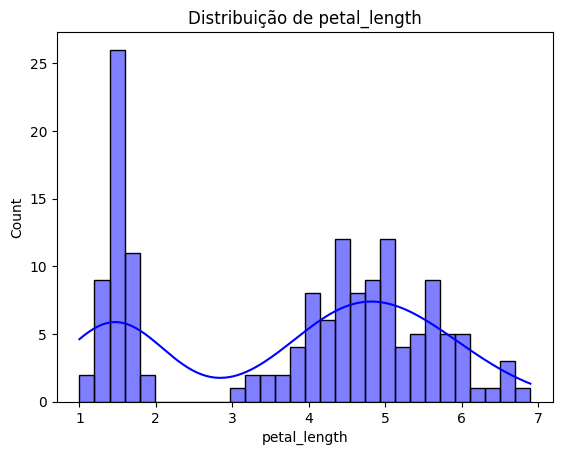

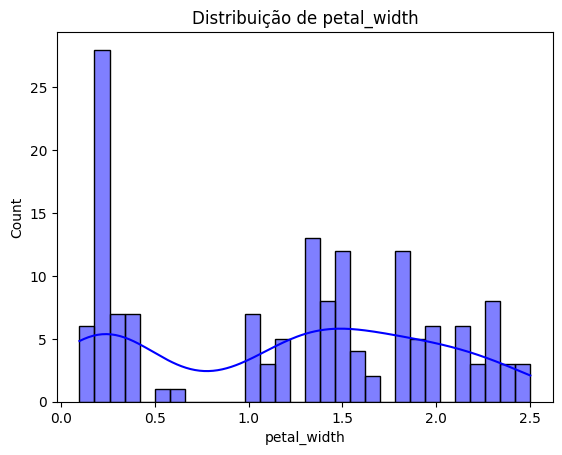

In [ ]:
# Histogramas das características numéricas
for feature in dataset.columns[:-1]:
    sns.histplot(dataset[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribuição de {feature}")
    plt.show()

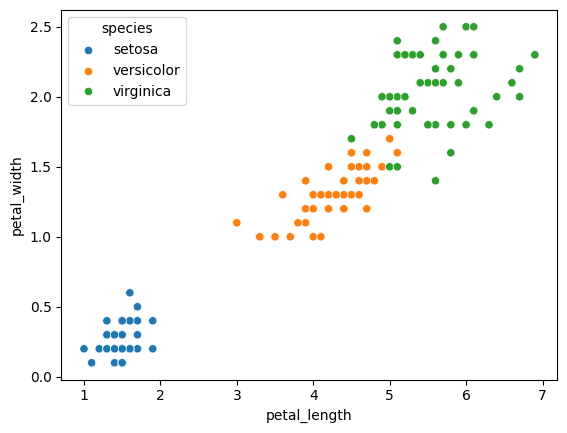

<function matplotlib.pyplot.show(close=None, block=None)>

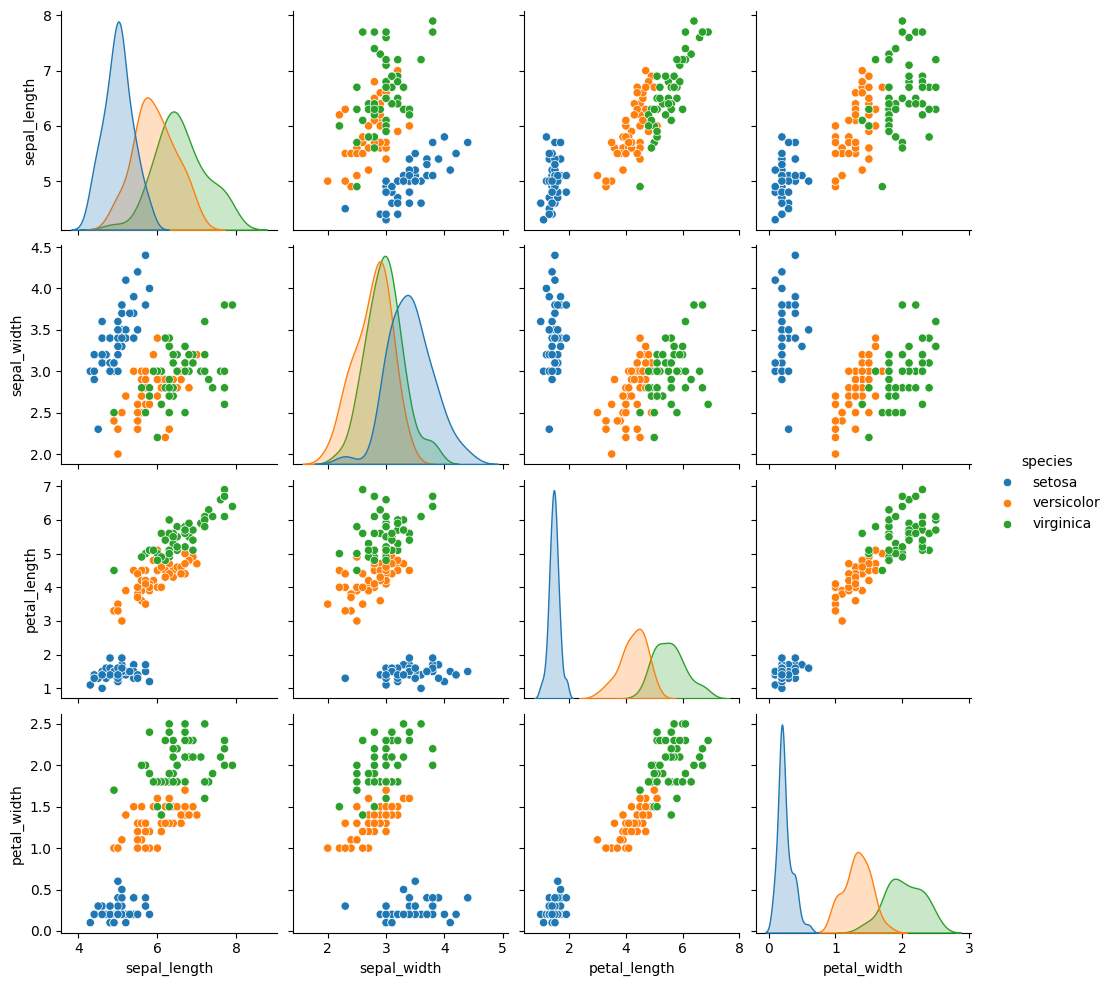

In [ ]:
# Esboça o gráfico de dispersão entre as variáveis de comprimento e largura da pétala da flor
sns.scatterplot(x='petal_length', y='petal_width', data=dataset, hue='species')
plt.show()
sns.pairplot(data=dataset, hue='species')
plt.show

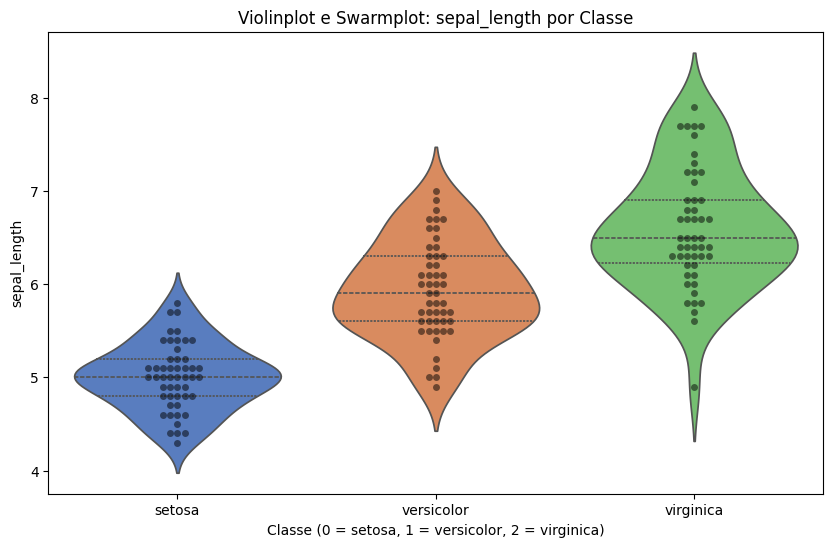

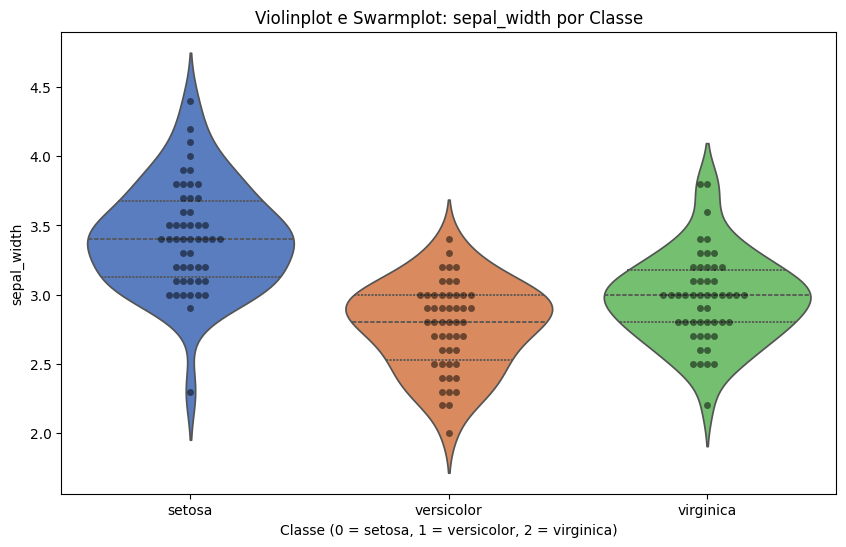

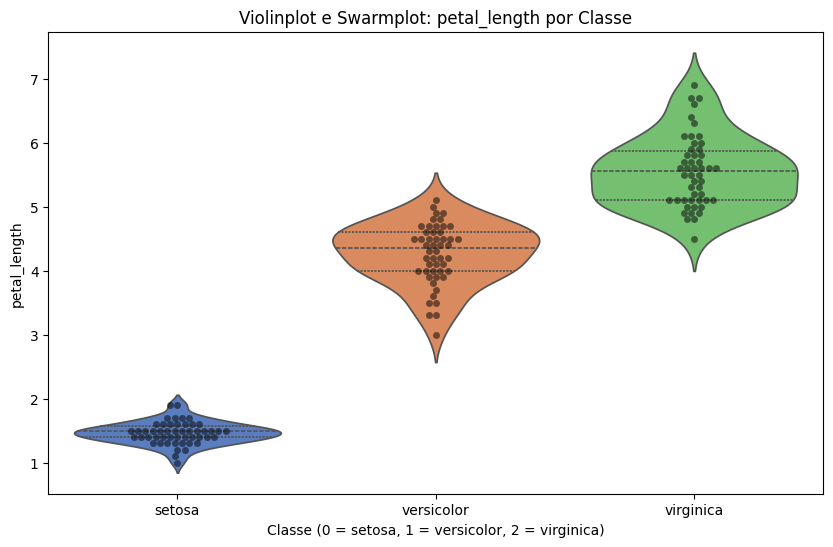

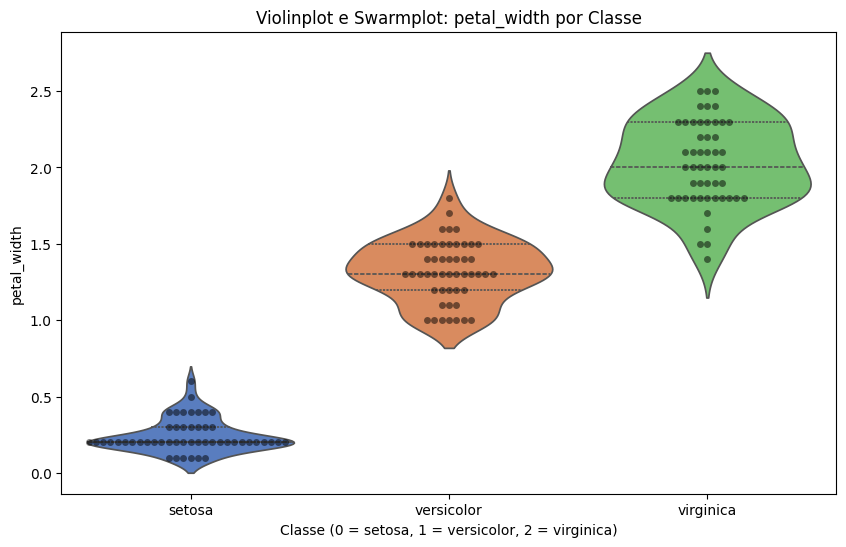

In [ ]:
# Gráficos de distribuição das características numéricas por classe do conjunto de dados
for feature in dataset.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=dataset, x="species", y=feature, hue='species', palette="muted", inner="quartile")
    sns.swarmplot(data=dataset, x="species", y=feature, color="k", alpha=0.5)
    plt.title(f"Violinplot e Swarmplot: {feature} por Classe")
    plt.xlabel("Classe (0 = setosa, 1 = versicolor, 2 = virginica)")
    plt.ylabel(feature)
    plt.show()

In [ ]:
# Separação dos dados de entrada e da coluna de rótulos
X = dataset.drop('species', axis=1)
y = dataset['species']

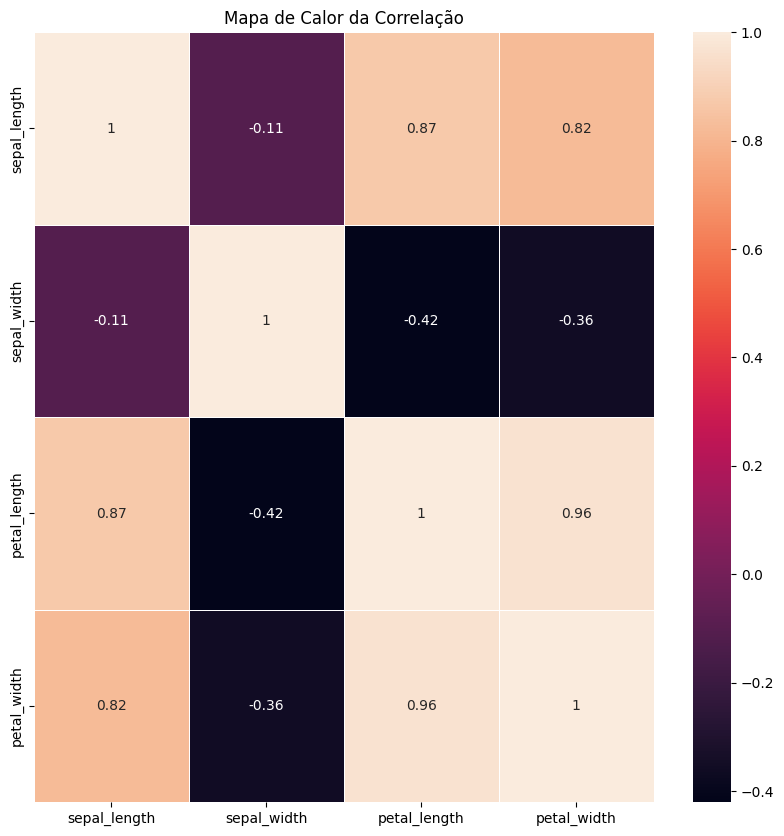

In [ ]:
# Heatmap da correlação dos dados de entrada do conjunto de dados
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, linewidth=0.5)
plt.title("Mapa de Calor da Correlação")
plt.show()

In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
rna_classifier = MLPClassifier(hidden_layer_sizes=(50, 100), solver = 'adam', activation='identity', max_iter=400, random_state=1)
rna_classifier = rna_classifier.fit(X_train, y_train)


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



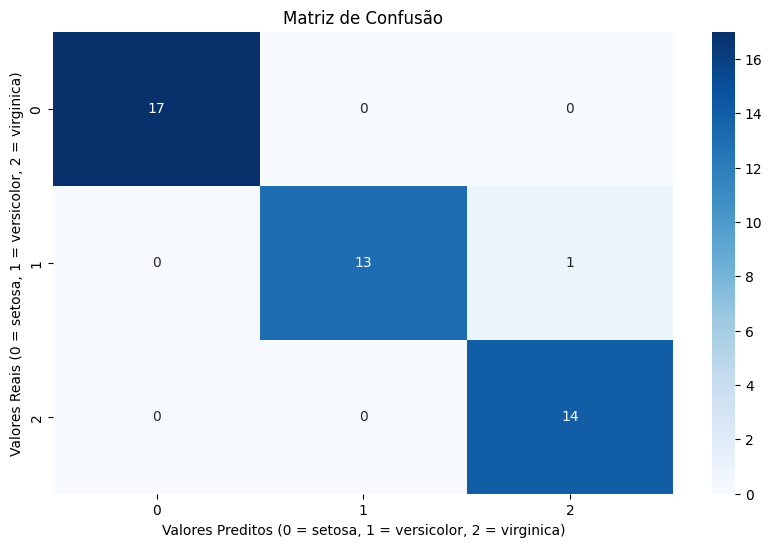

In [ ]:
y_pred = rna_classifier.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=dataset['species'].unique()))

cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cf, annot=True, cmap='Blues', fmt = 'd')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos (0 = setosa, 1 = versicolor, 2 = virginica)')
plt.ylabel('Valores Reais (0 = setosa, 1 = versicolor, 2 = virginica)')
plt.show()

In [ ]:
# Nova amostra para predição
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True, precision=4)

new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_pred = rna_classifier.predict(new_sample)
new_sample_proba = rna_classifier.predict_proba(new_sample)


print(f"A nova amostra é classificada como: {new_sample_pred[0]}")
print(f"Probabilidades de cada classe: {new_sample_proba[0]*100}%")

A nova amostra é classificada como: setosa
Probabilidades de cada classe: [99.9128  0.0872  0.    ]%


In [ ]:
joblib.dump(rna_classifier, 'rna_classifier_model.pkl') # exporta o modelo treinado

['rna_classifier_model.pkl']

# **Redes Neurais para Regressão**

In [ ]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Exportar modelos treinados em pkl
import joblib

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Algoritmo Redes Neurais para Regressão
from sklearn.neural_network import MLPRegressor

# Avaliação do modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
dataset = pd.read_csv("Housing.csv")
dataset.head()

In [ ]:
# Verificar informações gerais
dataset.info()

In [ ]:
# Verificar estatísticas básicas
dataset.describe(include='all')

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna")
print(dataset.isnull().sum())

In [ ]:
# Codificação binária para colunas yes/no
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dataset_encoded = dataset.copy()
dataset_encoded[binary_cols] = dataset_encoded[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# One-hot encoding para 'furnishingstatus'
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['furnishingstatus'],dtype=int)

dataset_encoded.head()

In [ ]:
# Separar variáveis independentes (X) e variável dependente (y)
X = dataset_encoded.drop('price', axis=1)
y = dataset_encoded['price']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar transformação logarítmica ao y (preço)
y_log = np.log1p(y)

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

In [ ]:
rna_regressor = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    batch_size='auto',
    activation='tanh',
    solver = 'adam',
    max_iter=2000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True)

rna_regressor = rna_regressor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

y_pred = rna_regressor.predict(X_test)

# Reverter para escala original
y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)

mse = mean_squared_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = mean_absolute_percentage_error(y_test_real, y_pred_real)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_real, y=y_pred_real, alpha=0.7)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')  # linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos (KNN)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Traçar a linha dos valores reais
plt.plot(y_test_real.values, label='Valor Real', color='red', linewidth=2, linestyle='-')

# Traçar a linha dos valores previstos
plt.plot(y_pred_real, label='Valor Predito', color='blue', linewidth=2, linestyle='--')

plt.title('Valores Reais vs. Valores Preditos - KNN Regressor')
plt.xlabel('Índice da Amostra')
plt.ylabel('Preço da Casa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
new_sample = X_test[[0]]
true_value = y_test.iloc[0]
true_value_real = np.expm1(true_value)
predicted_value = rna_regressor.predict(new_sample)[0]
predicted_value_real = np.expm1(predicted_value)

print(f"Valor real: {true_value_real:.2f}")
print(f"Valor previsto: {predicted_value_real:.2f}")

In [ ]:
joblib.dump(rna_regressor, 'rna_regressor_model.pkl') # exporta o modelo treinado

# **K-Means: Exemplo Simples**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
dados = np.array([[1.9, 7.3], [3.4, 7.5], [2.5, 6.8], [1.5, 6.5],
                  [3.5, 6.4], [2.2, 5.8], [3.4, 5.2], [3.6, 4.0],
                  [5.0, 3.2], [4.5, 2.4], [6.0, 2.6], [1.9, 3.0],
                  [1.0, 2.7], [1.9, 2.4], [0.8, 2.0], [1.6, 1.8],
                  [1.0, 1.0]])

print(dados)

In [ ]:
centroides_iniciais = np.array([[1.0, 5.0], [0.5, 1.5], [3.7, 2.3]])
print(centroides_iniciais)

In [ ]:
kmeans = KMeans(n_clusters=3, init=centroides_iniciais, n_init=1, max_iter = 3)

kmeans.fit(dados)

rotulos = kmeans.labels_
centroides_finais = kmeans.cluster_centers_
inertia = kmeans.inertia_

print("Rótulos de Cluster:")
print(rotulos)

print("\nCoordenadas dos Centroides Finais:")
print(centroides_finais)

print("\nValor da Inércia:")
print(inertia)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dados[:, 0], dados[:, 1], c=rotulos, cmap='viridis')
plt.scatter(centroides_finais[:, 0], centroides_finais[:, 1], c='red', marker='X', s=100)
plt.title('Resultado do K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# **K-Means para Agrupamento**

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Configuração para visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
dataset = pd.read_csv("iris.csv")
dataset = dataset.drop('species', axis=1)
dataset = dataset.drop(['sepal_length', 'sepal_width'], axis=1)
dataset.head()

In [ ]:
# Informações gerais do dataset
dataset.info()

In [ ]:
# Análise descritiva do dataset
dataset.describe(include='all')

In [ ]:
# Histograma para visualização da distribuição dos dados em cada feature
for feature in dataset.columns:
    sns.histplot(dataset[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribuição de {feature}")
    plt.show()

In [ ]:
# Gráficos de distribuição das características numéricas por classe do conjunto de dados
for feature in dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=dataset, y=feature, palette="muted", inner="quartile")
    sns.swarmplot(data=dataset, y=feature, color="k", alpha=0.5)
    plt.title(f"Violinplot e Swarmplot: {feature}")
    plt.ylabel(feature)
    plt.show()

In [ ]:
# KMeans - Método do Cotovelo
distortions = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(dataset)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.title("Método do Cotovelo - KMeans")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans.fit(dataset)

# Silhouette Score
silhouette_avg = silhouette_score(dataset, kmeans.labels_)
print(f"Silhouette Score para KMeans: {silhouette_avg:.2f}")

# Visualização Silhouette
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(dataset)
visualizer.show()

# **Versões**

In [ ]:
import sklearn
import numpy
import matplotlib
import seaborn as sns
import joblib
import pandas


print("sklearn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("joblib:", joblib.__version__)
print("pandas:", pandas.__version__)

sklearn: 1.6.1
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2
joblib: 1.5.2
pandas: 2.2.2
